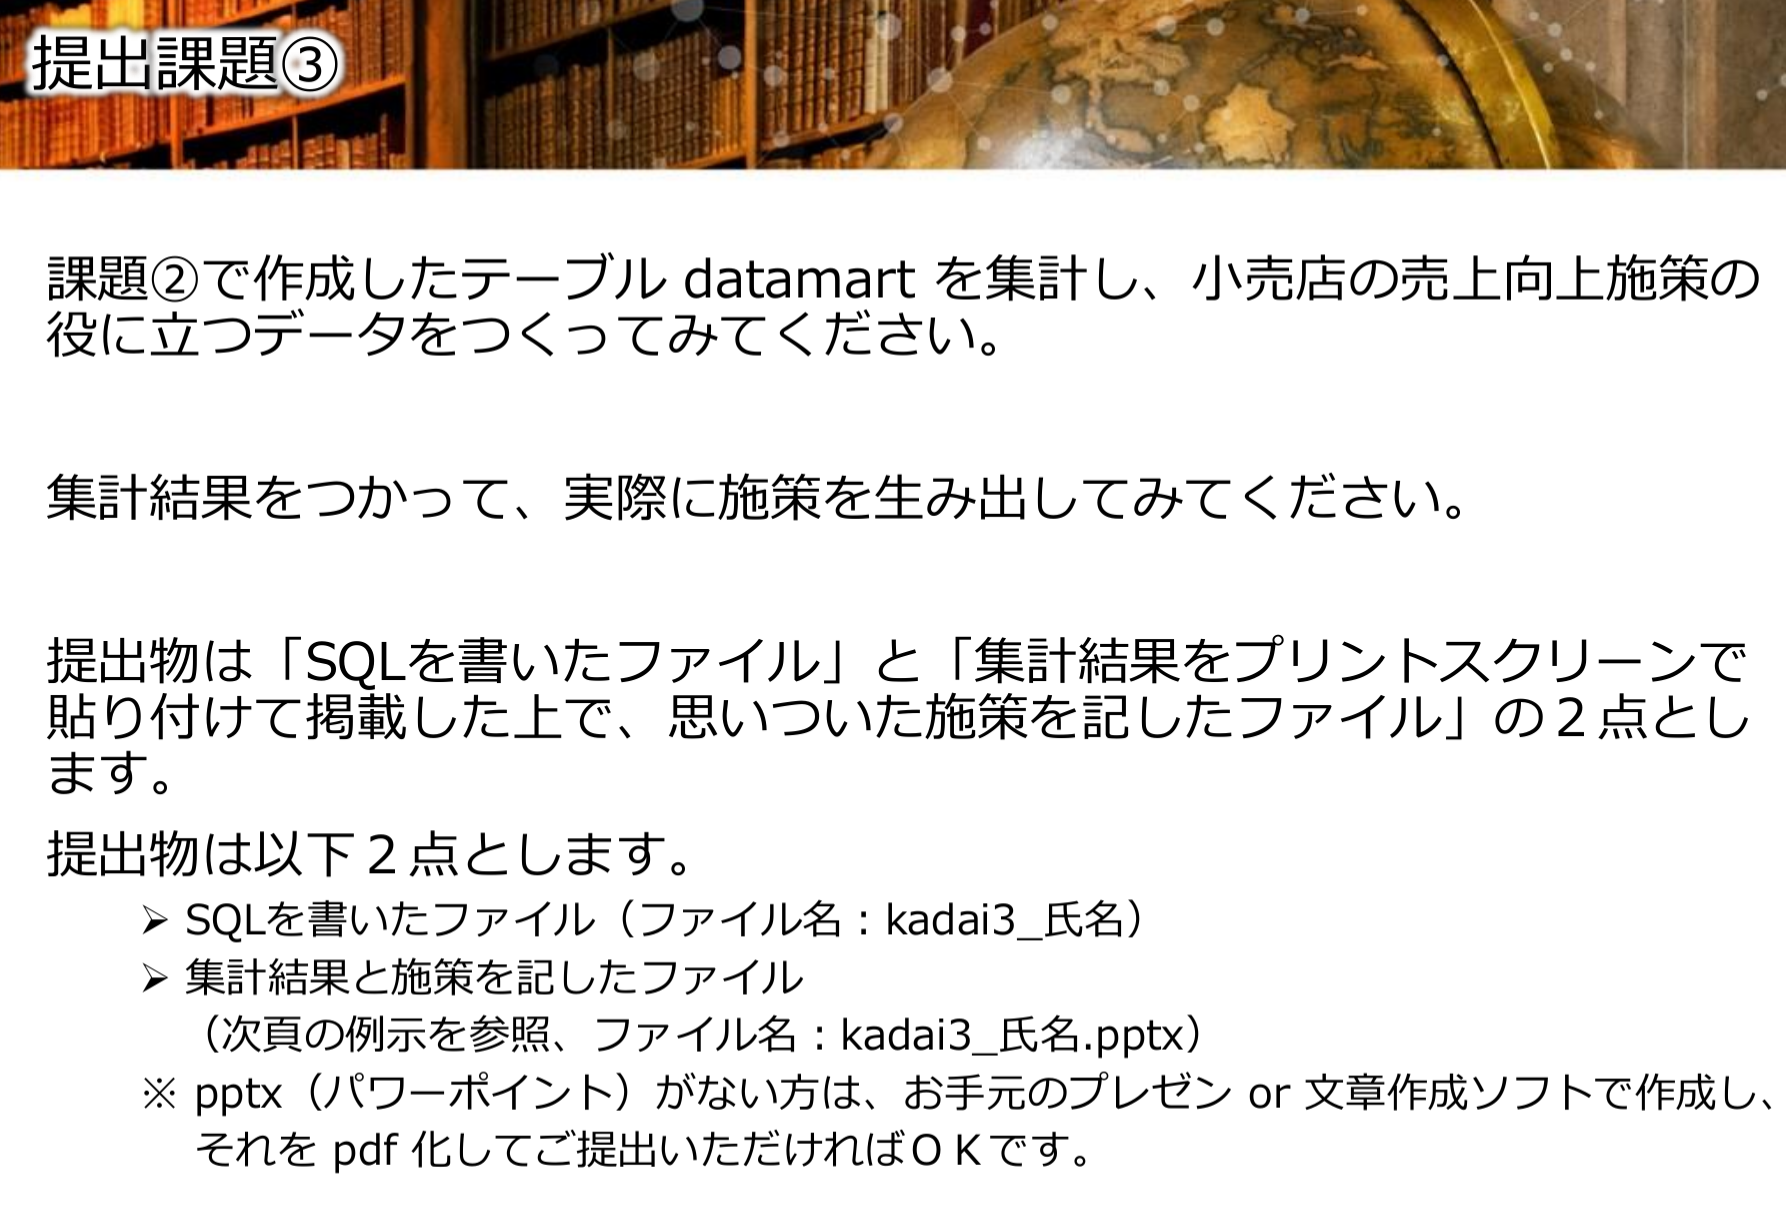

In [6]:
from IPython.display import Image
Image("/media/bruceashbee/storage drive1/photo_for_notes/SQL SCHOOL KADAI3.png")

In [20]:
import mysql.connector as sql
import pandas as pd

mydb = sql.connect (
    host = "localhost",
    user = "root",
    password = "ZAQs8271911c$",
    auth_plugin='mysql_native_password',
    buffered = True,          # using this for reading table, panda dont need it
    #multi=True,                 # if wanna use mulitple query
    database = "sql_fr_ai"
)

#? only execute sql query wo passing data to panda dataframe
# mycoursor = mydb.cursor()
# sql_query = """
# SELECT

# """
# mycoursor.execute(sql_query)


#? execute sql query  AND  passing data to panda dataframe
#! format in MYsql is for changing integer looks like currency
#! format(value, number_of_decimal)
sql_query = """
SELECT
            CASE WHEN emp_table.Food = "Food"
                        THEN emp_table.Food
                        ELSE 0
            END AS Food,
            CASE WHEN emp_table.Food = "Food"
                        THEN emp_table.Food
                        ELSE 0
            END AS Food,

SELECT
            format(SUM(food_total),0) AS Food,
            format(SUM(fashion_total),0) AS Fashion,	
            format(SUM(sports_total),0) AS Sport,	
            format(SUM(necesssities_total),0) AS Necessities,	
            format(SUM(book_cd_dvd_total),0) AS BOOK_CD_DVD
FROM  
            datamart
"""
#         Food	        Fashion	                Sport	                Necessities	     BOOK_CD_DVD
# 0	11188880.0	2681490.0	        2781320.0	        2726720.0	        799360.0

df = pd.read_sql_query(
    sql_query,
    mydb)


df


,Food,Fashion,Sport,Necessities,BOOK_CD_DVD
0,"11,188,880","2,681,490","2,781,320","2,726,720","799,360"


In [11]:
sql_query = """
SELECT *
FROM datamart
"""

result = pd.read_sql_query(
    sql_query,
    mydb
)
result.head(10)

,user_id,age,gender,sports,WatchingSports,travel,mobility,reading,music,movie,computer,game,gamble,food_total,fashion_total,sports_total,necesssities_total,book_cd_dvd_total,total,age_group
0,U000001,42,F,1,1,1,1,4,5,3,3,1,1,81570.0,15930.0,47890.0,3640.0,920.0,149950.0,40-49
1,U000002,54,M,4,3,1,1,1,2,2,1,2,1,85830.0,48210.0,25840.0,22390.0,1340.0,183610.0,50-59
2,U000003,57,F,1,1,1,1,2,1,1,5,5,1,78700.0,8100.0,46390.0,18690.0,1670.0,153550.0,50-59
3,U000004,31,F,2,1,1,1,5,3,5,3,1,2,96370.0,16320.0,5640.0,24300.0,0.0,142630.0,30-39
4,U000005,58,F,1,1,4,3,1,2,1,1,1,1,86580.0,33770.0,22060.0,12240.0,1870.0,156520.0,50-59
5,U000006,45,M,1,1,2,1,2,1,1,1,1,5,54170.0,75960.0,7680.0,1920.0,3250.0,142980.0,40-49
6,U000007,40,F,5,4,1,1,1,1,1,1,1,1,95660.0,21290.0,29800.0,23920.0,3070.0,173740.0,40-49
7,U000008,40,F,1,1,1,1,1,1,2,5,5,1,82680.0,7400.0,0.0,37570.0,3920.0,131570.0,40-49
8,U000009,49,F,2,1,1,1,1,1,1,5,4,1,78340.0,17190.0,4670.0,20840.0,4740.0,125780.0,40-49
9,U000010,22,M,1,1,1,1,4,4,3,3,1,2,44180.0,6590.0,18240.0,25390.0,10470.0,104870.0,20-29


In [5]:
sql_query = """
## shop user data left join summay of user transaction,
## and create age group
SELECT
		shop_user.*,
        summary_user_tran.food_total,
        summary_user_tran.fashion_total,
        summary_user_tran.sports_total,
        summary_user_tran.necesssities_total,
        summary_user_tran.book_cd_dvd_total,
        summary_user_tran.total,
        CONCAT( LPAD( ( FLOOR(shop_user.age / 10 ) * 10) ,2 ,0 ),
							"-",
                			LPAD( ( ( FLOOR(shop_user.age / 10 ) + 1 ) * 10 - 1) ,2 ,0 )
			  			) AS age_group
FROM (
	## changing vertical table into horizontal table and sum up total amount
	SELECT
			user_id,
			MAX(
				CASE WHEN sum_tran_category.category = "Food"
						THEN sum_tran_category.total_c
						ELSE 0
				END
			) AS food_total,
			MAX(
				CASE WHEN sum_tran_category.category = "Fashion"
						THEN sum_tran_category.total_c
						ELSE 0
				END
			) AS fashion_total,
			MAX(
				CASE WHEN sum_tran_category.category = "Sports"
						THEN sum_tran_category.total_c
						ELSE 0
				END
			) AS sports_total,
			MAX(
				CASE WHEN sum_tran_category.category = "Necessities"
						THEN sum_tran_category.total_c
						ELSE 0
				END
			) AS necesssities_total,
			MAX(
				CASE WHEN sum_tran_category.category = "Book-CD-DVD"
						THEN sum_tran_category.total_c
						ELSE 0
				END
			) AS book_cd_dvd_total,
			SUM(sum_tran_category.total_c) AS total
	FROM (
			-- sum up total spending on each category
			select 
					user_id,
					category,
					sum(amount) AS total_c
			from 
					user_tran
			group by
					user_id,
					category
	) AS sum_tran_category
	GROUP BY
		user_id
) AS summary_user_tran
LEFT JOIN
		shop_user
ON 
	summary_user_tran.user_id = shop_user.user_id
# for checking purpose
# -- U000005 total should be
# -- food_total	fashion_total	sports_total	necesssities_total	book_cd_dvd_total	
# -- 86580.0	    33770.0	        22060.0	        12240.0	            1870.0	            
# -- total	    age_group
# -- 156520.0	    50-59 
# WHERE
# 	shop_user.user_id = "U000005"


"""

df = pd.read_sql_query(
    sql_query,
    mydb)

df.head(10)

,user_id,age,gender,sports,WatchingSports,travel,mobility,reading,music,movie,computer,game,gamble,food_total,fashion_total,sports_total,necesssities_total,book_cd_dvd_total,total,age_group
0,U000001,42,F,1,1,1,1,4,5,3,3,1,1,81570.0,15930.0,47890.0,3640.0,920.0,149950.0,40-49
1,U000002,54,M,4,3,1,1,1,2,2,1,2,1,85830.0,48210.0,25840.0,22390.0,1340.0,183610.0,50-59
2,U000003,57,F,1,1,1,1,2,1,1,5,5,1,78700.0,8100.0,46390.0,18690.0,1670.0,153550.0,50-59
3,U000004,31,F,2,1,1,1,5,3,5,3,1,2,96370.0,16320.0,5640.0,24300.0,0.0,142630.0,30-39
4,U000005,58,F,1,1,4,3,1,2,1,1,1,1,86580.0,33770.0,22060.0,12240.0,1870.0,156520.0,50-59
5,U000006,45,M,1,1,2,1,2,1,1,1,1,5,54170.0,75960.0,7680.0,1920.0,3250.0,142980.0,40-49
6,U000007,40,F,5,4,1,1,1,1,1,1,1,1,95660.0,21290.0,29800.0,23920.0,3070.0,173740.0,40-49
7,U000008,40,F,1,1,1,1,1,1,2,5,5,1,82680.0,7400.0,0.0,37570.0,3920.0,131570.0,40-49
8,U000009,49,F,2,1,1,1,1,1,1,5,4,1,78340.0,17190.0,4670.0,20840.0,4740.0,125780.0,40-49
9,U000010,22,M,1,1,1,1,4,4,3,3,1,2,44180.0,6590.0,18240.0,25390.0,10470.0,104870.0,20-29
